# Chapter 3 Assignments


In [3]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [1]:
import nsfg
import matplotlib.pyplot as plt
import thinkstats2

In [3]:
def PmfMean(pmf):
   #probability Mass function
    return sum(p * x for x, p in pmf.Items())

In [4]:
def PmfVar(pmf, mu=None):
    #Variance
    if mu is None:
        mu = PmfMean(pmf)

    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

## Exercises 3.1

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [8]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [2]:
resp = nsfg.ReadFemResp()
resp.head(3)

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167


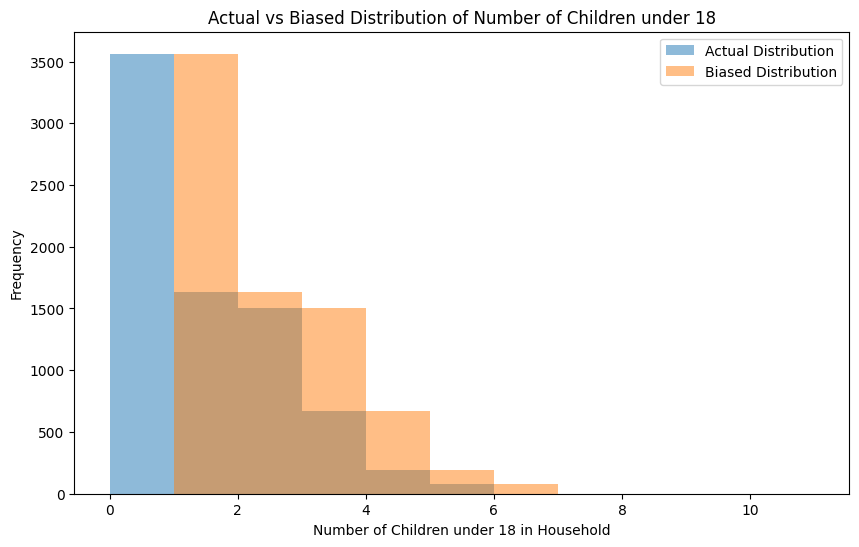

Actual Mean: 1.02
Biased Mean: 2.02


In [3]:
# Actual distribution
actual_distribution = resp['numkdhh']

# Biased distribution,# Assuming each child reports one more child in the household
biased_distribution = resp['numkdhh'] + 1  

# Plotting the histograms
plt.figure(figsize=(10, 6))

plt.hist(actual_distribution, bins=range(12), alpha=0.5, label='Actual Distribution')
plt.hist(biased_distribution, bins=range(12), alpha=0.5, label='Biased Distribution')

plt.xlabel('Number of Children under 18 in Household')
plt.ylabel('Frequency')
plt.title('Actual vs Biased Distribution of Number of Children under 18')
plt.legend()

plt.show()

# Computing means
actual_mean = actual_distribution.mean()
biased_mean = biased_distribution.mean()

print(f'Actual Mean: {actual_mean:.2f}')
print(f'Biased Mean: {biased_mean:.2f}')


The class size paradox is evident in the results. The actual mean, representing the true distribution of the number of children under 18 in households, is significantly lower than the biased mean obtained by assuming each child reports one additional child.

This bias occurs because larger families are over-represented when surveying children. To address this, it is crucial to consider and correct for this bias in any analysis or interpretation involving family size.

Researchers should be aware of and account for such biases when relying on self-reported data from certain groups, especially in scenarios where certain characteristics may influence the likelihood of being included in the sample.

## Exercises 3.2

Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

The code is as below. **the result showed that the define functions returns the same results.**

In [9]:
def PmfMean(pmf):
    NewMean = 0
    for (i,p) in pmf.Items():
        NewMean += i * p
    print(f'pmf Mean from PmfMean function is {NewMean}')

def PmfVar(pmf, mean):
    NewVar = 0
    for (i,p) in pmf.Items():
        NewVar += p*((i-mean)**2)
    print(f'pmf Var from PmfVar function is {round(NewVar,2)}')

def main(script):
    data = [5, 2, 2, 1, 8]
    pmf = thinkstats2.Pmf(data)
    print(pmf)
    print(f'pmf mean from Mean function is {round(pmf.Mean(),2)}')
    M=pmf.Mean()
    PmfMean(pmf)
    print()
    print(f'pmf var from var function is {round(pmf.Var(),2)}')
    PmfVar(pmf, M)


if __name__ == '__main__':
   main('test')

Pmf({5: 0.2, 2: 0.4, 1: 0.2, 8: 0.2})
pmf mean from Mean function is 3.6
pmf Mean from PmfMean function is 3.6

pmf var from var function is 6.64
pmf Var from PmfVar function is 6.64


## Exercises 4.1

How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. 

I am prematrued 3 months and suvived after 1 week of ICU. my mother said I am about 5.1 lb at birth. The code below shows my rank is 5.66%

In [10]:
import nsfg

def read_data():
    preg = nsfg.ReadFemPreg()

    live = preg[preg.outcome == 1]
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

    return live, firsts, others

def main():
    live, firsts, others = read_data()
    first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
    my_rank = first_cdf.PercentileRank(5.1)
    print(f'Xin birth rank is{my_rank}%')

if __name__ == '__main__':
    main()

Xin birth rank is5.661242264496906%


C:\Users\gyanr\gyan-python-workspace\DSC-530\nsfg.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
C:\Users\gyanr\gyan-python-workspace\DSC-530\nsfg.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

## Exercises 4.2

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

The code is as below. since all number are unique and appear once, so the PMF looks like a solid block, but CDF is a staright line so **the distribution is uniform.**

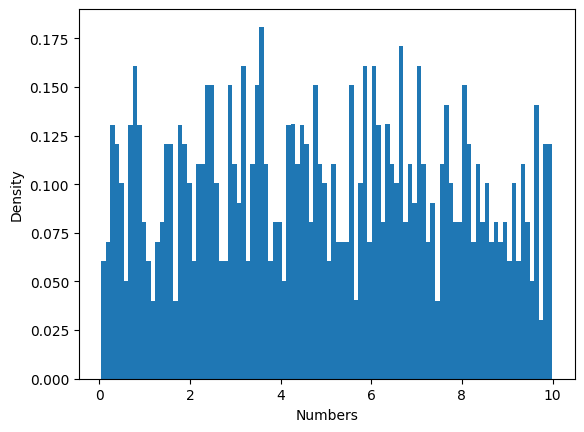

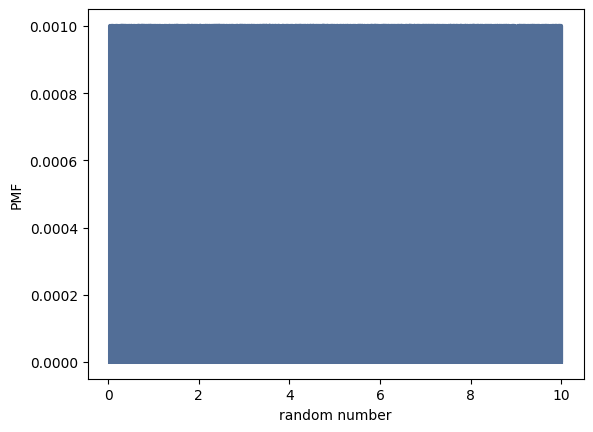

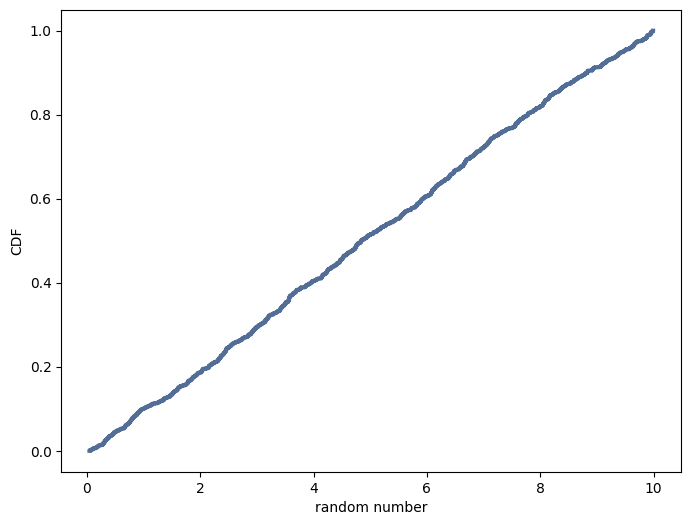

<Figure size 800x600 with 0 Axes>

In [19]:
import random
import thinkplot
import matplotlib.pyplot as plt

Random_Test =[]

for i in range(0,1000):
    x = random.random()*10
    Random_Test.append(x)

pmf = thinkstats2.Pmf(Random_Test)
plt.hist(Random_Test, bins = 100, density=True)
plt.xlabel("Numbers")
plt.ylabel("Density")
plt.title = ('Histogram')
plt.show()

thinkplot.Pmf(pmf)
thinkplot.show(xlabel="random number", ylabel="PMF")

random_cdf = thinkstats2.Cdf(Random_Test)
thinkplot.Cdf(random_cdf)
thinkplot.Show(xlabel='random number', ylabel='CDF')